## e) Tabla y gráfico de fallecimientos por todas las causas

Vamos a elaborar dos gráficas, en la primera se hará una representación donde en el eje horizontal figuren los años y en el vertical el número de fallecimientos por todas las causas para todos los géneros y todos los rangos de edad en ese año en concreto, en la segunda aparecerá esta misma serie de datos pero adicionalmente gráficas segregadas para hombres y mujeres en todos los rangos de edades y de la misma manera, todas las causas.

Comenzamos elaborando una función para filtrar las filas que nos interesen del DF. Esta función devuelve un valor boolean (True o False) en función de si encuentra una secuencia de string ("Todas las causas") en el string que se pasa como argumento.

In [42]:
import re

def contiene_todas_causas(causa):
    
    """
    Función que elabora una máscara como una lista de valores booleans.
        
    Parameters
    ----------
    causa : str
        String que detalla la causa de muerte.
    
    Returns
    -------
    Boolean: True or False
        Dependiendo si encuentra el substring "patron" en el argumento "causa". En caso de encontrarlo devuelve True,
        si no, tendremos un False.
    
    
    Example
    -------
    >>> es_grupo_y_no_total("ABC Todas las causas ZXY")
    True
    >>> es_grupo_y_no_total("ABC Todas ZXY")
    False
    """
    

    if re.search("Todas las causas", causa) != None:
        
        return(True)

    else:
        
        return(False)

In [50]:
def cargar_datos(nombre_csv):
    
    """
    Función que importa un csv y lo pasa a PandasDF seleccionando sólo las filas que nos interesan a través de una
    máscara de booleans elaborada con la función "es_grupo_y_no_total" pasándole como argumento los strings de la columna
    "Causa de muerte".
        
    Parameters
    ----------
    nombre_csv : str
        Nombre del csv a importar, que figura en la misma carpeta que el notebook de esta función.
    
    Returns
    -------
    Pandas DataFrame.
        Un dataframe de Pandas en el que se han seleccionado unicamente las filas que cumplen una determinada condición a
        través de una máscara que es una lista(vector) de valores boolean.
    
    """
        
    # Leemos el csv:
    
    DF_sucio = pd.read_csv(nombre_csv, delimiter = ";",dtype = {"Total": str})
    
    # Reemplazamos las apariciones de "." por nada utilizando expresiones regulares.
    
    DF_sucio["Total"] = DF_sucio["Total"].replace(regex=["\."],value="")
    
    # Tras ello, casteamos la columna objetivo como enteros y el resto como sus tipos deseados.
    
    DF_sucio = DF_sucio.astype({"Causa de muerte":"string",
                                "Sexo":"string",
                                "Edad":"string",
                                "Periodo":"int32",
                                "Total": "int64"})
    
    
    # Elaboramos una lista con los valores que figuran en la columna "Causa de muerte" del DF.
    
    lista = DF_sucio["Causa de muerte"]
    
    # Elaboramos una lista de valores boolean (máscara) aplicando secuencialmente la función predefinida en este notebook
    # "contiene_todas_causas" a todos los valores de la columna "Causa de muerte"
    
    cond = [(contiene_todas_causas(i)) for i in lista]
    
    # Aplicamos la máscara para la selección.
    
    DF_limpio = DF_sucio[cond]
    
    
    
    return(DF_limpio)

Una vez elaboradas las funciones que tenemos que utilizar las aplicamos e importamos nuestros datos:

In [51]:
import pandas as pd

datos = cargar_datos("ine_mortalidad_espanna.csv")

Podemos mostrarlos por pantalla para hacer una inspección.

In [52]:
datos

,Causa de muerte,Sexo,Edad,Periodo,Total
0,001-102 I-XXII.Todas las causas,Total,Todas las edades,2018,427721
1,001-102 I-XXII.Todas las causas,Total,Todas las edades,2017,424523
2,001-102 I-XXII.Todas las causas,Total,Todas las edades,2016,410611
3,001-102 I-XXII.Todas las causas,Total,Todas las edades,2015,422568
4,001-102 I-XXII.Todas las causas,Total,Todas las edades,2014,395830
...,...,...,...,...,...
2569,001-102 I-XXII.Todas las causas,Mujeres,95 y más años,1984,3432
2570,001-102 I-XXII.Todas las causas,Mujeres,95 y más años,1983,3494
2571,001-102 I-XXII.Todas las causas,Mujeres,95 y más años,1982,2983
2572,001-102 I-XXII.Todas las causas,Mujeres,95 y más años,1981,2873


Aunque es más práctico hacer lo siguiente para corroborar que el único valor presente en "Causa de muerte" es el requerido.

In [53]:
datos.drop_duplicates(["Causa de muerte"])[["Causa de muerte"]]

,Causa de muerte
0,001-102 I-XXII.Todas las causas


Una vez importado el DF solo con las filas con "Todas las causas de muerte", podemos aplicar filtros sobre los DF para ir cogiendo las filas que nos interesen en cada apartado.

Para comenzar, creamos un DF con todos los sexos y todos los rangos de edad:

In [63]:
cond1 = datos["Sexo"] == "Total"

cond2 = datos["Edad"] == "Todas las edades"

datos_todos_sexos = datos[cond1 & cond2]

In [64]:
datos_todos_sexos

,Causa de muerte,Sexo,Edad,Periodo,Total
0,001-102 I-XXII.Todas las causas,Total,Todas las edades,2018,427721
1,001-102 I-XXII.Todas las causas,Total,Todas las edades,2017,424523
2,001-102 I-XXII.Todas las causas,Total,Todas las edades,2016,410611
3,001-102 I-XXII.Todas las causas,Total,Todas las edades,2015,422568
4,001-102 I-XXII.Todas las causas,Total,Todas las edades,2014,395830
5,001-102 I-XXII.Todas las causas,Total,Todas las edades,2013,390419
6,001-102 I-XXII.Todas las causas,Total,Todas las edades,2012,402950
7,001-102 I-XXII.Todas las causas,Total,Todas las edades,2011,387911
8,001-102 I-XXII.Todas las causas,Total,Todas las edades,2010,382047
9,001-102 I-XXII.Todas las causas,Total,Todas las edades,2009,384933


Y lo representamos gráficamente añadiendo títulos a los ejes y una leyenda:

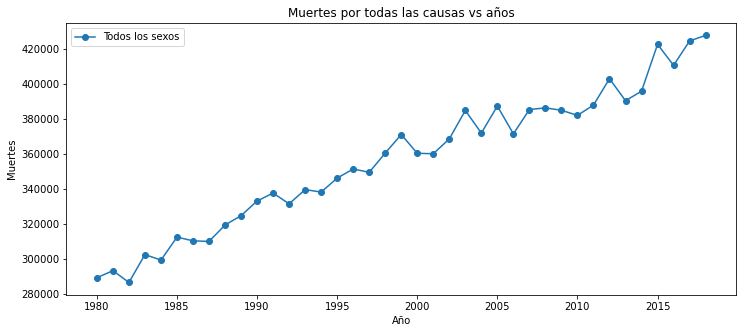

In [84]:
import matplotlib.pyplot as plt

# Ajustamos las dimensiones del gráfico.

f = plt.figure() 
f.set_figwidth(12) 
f.set_figheight(5) 

# Y graficamos con las columnas requeridas y un formato de puntos unidos por líneas.

plt.plot(datos_todos_sexos["Periodo"], datos_todos_sexos["Total"], 'o-', label="Todos los sexos")
plt.title("Muertes por todas las causas vs años")
plt.xlabel("Año")
plt.ylabel("Muertes")
plt.legend(loc="upper left")
plt.show()

Como a continuación se nos requiere hacer una representación gráfica donde aparezca la misma curva con curvas segregadas por sexo anexadas en el mismo gráfico, vamos a generar dos DF secundarios según los sexos con procedimiento similares a los ya utilizados:

In [58]:
cond = datos["Sexo"] == "Hombres"

cond2 = datos["Edad"] == "Todas las edades"

# Imponemos condiciones de filtro y elaboramos el DF para Sexo = Hombres.

datos_hombres = datos[cond & cond2]

In [59]:
datos_hombres

,Causa de muerte,Sexo,Edad,Periodo,Total
858,001-102 I-XXII.Todas las causas,Hombres,Todas las edades,2018,216442
859,001-102 I-XXII.Todas las causas,Hombres,Todas las edades,2017,214236
860,001-102 I-XXII.Todas las causas,Hombres,Todas las edades,2016,208993
861,001-102 I-XXII.Todas las causas,Hombres,Todas las edades,2015,213309
862,001-102 I-XXII.Todas las causas,Hombres,Todas las edades,2014,201571
863,001-102 I-XXII.Todas las causas,Hombres,Todas las edades,2013,199834
864,001-102 I-XXII.Todas las causas,Hombres,Todas las edades,2012,205920
865,001-102 I-XXII.Todas las causas,Hombres,Todas las edades,2011,199854
866,001-102 I-XXII.Todas las causas,Hombres,Todas las edades,2010,198121
867,001-102 I-XXII.Todas las causas,Hombres,Todas las edades,2009,199095


In [60]:
cond = datos["Sexo"] == "Mujeres"

cond2 = datos["Edad"] == "Todas las edades"

# Imponemos condiciones de filtro y elaboramos el DF para Sexo = Mujeres.

datos_mujeres = datos[cond & cond2]

In [61]:
datos_mujeres

,Causa de muerte,Sexo,Edad,Periodo,Total
1716,001-102 I-XXII.Todas las causas,Mujeres,Todas las edades,2018,211279
1717,001-102 I-XXII.Todas las causas,Mujeres,Todas las edades,2017,210287
1718,001-102 I-XXII.Todas las causas,Mujeres,Todas las edades,2016,201618
1719,001-102 I-XXII.Todas las causas,Mujeres,Todas las edades,2015,209259
1720,001-102 I-XXII.Todas las causas,Mujeres,Todas las edades,2014,194259
1721,001-102 I-XXII.Todas las causas,Mujeres,Todas las edades,2013,190585
1722,001-102 I-XXII.Todas las causas,Mujeres,Todas las edades,2012,197030
1723,001-102 I-XXII.Todas las causas,Mujeres,Todas las edades,2011,188057
1724,001-102 I-XXII.Todas las causas,Mujeres,Todas las edades,2010,183926
1725,001-102 I-XXII.Todas las causas,Mujeres,Todas las edades,2009,185838


Ahora podemos plotear todo junto en la misma gráfica, determinando el tamaño que queremos y añadiendo una leyenda y títulos globales y por ejes para clarificar la interpretación.

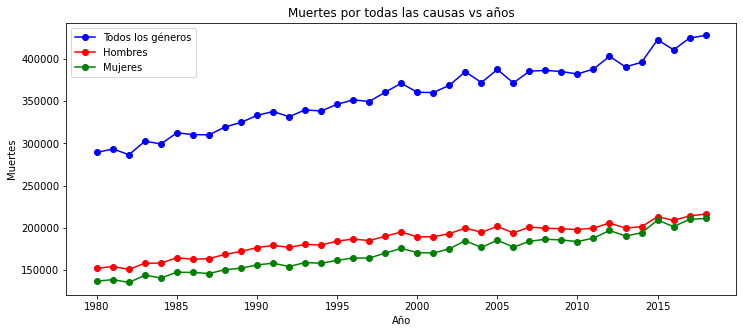

In [81]:
f = plt.figure() 
f.set_figwidth(12) 
f.set_figheight(5)

plt.plot(datos_todos_sexos["Periodo"], datos_todos_sexos["Total"], "bo-", label="Todos los géneros")
plt.plot(datos_todos_sexos["Periodo"], datos_hombres["Total"], "ro-", label="Hombres")
plt.plot(datos_todos_sexos["Periodo"], datos_mujeres["Total"], "go-", label="Mujeres")
plt.title("Muertes por todas las causas vs años")
plt.xlabel("Año")
plt.ylabel("Muertes")
plt.legend(loc="upper left")
plt.show()